In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf

In [203]:
file_cache = '../cache/7735.T_2024-04-24_2024-04-25_1m.pkl'
#file_cache = '../cache/8035.T_2024-04-24_2024-04-25_1m.pkl'
df = pd.read_pickle(file_cache)
df

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-04-24 09:03:00+09:00,16815.0,16895.0,16695.0,16695.0,16695.0,0
2024-04-24 09:04:00+09:00,16705.0,16750.0,16620.0,16650.0,16650.0,36300
2024-04-24 09:05:00+09:00,16660.0,16680.0,16575.0,16655.0,16655.0,30700
2024-04-24 09:06:00+09:00,16665.0,16700.0,16645.0,16700.0,16700.0,18600
2024-04-24 09:07:00+09:00,16700.0,16735.0,16665.0,16695.0,16695.0,22500
...,...,...,...,...,...,...
2024-04-24 14:55:00+09:00,16855.0,16855.0,16840.0,16840.0,16840.0,5800
2024-04-24 14:56:00+09:00,16845.0,16855.0,16845.0,16850.0,16850.0,6600
2024-04-24 14:57:00+09:00,16850.0,16855.0,16850.0,16855.0,16855.0,3500


In [204]:
series_high_low = df['High'] - df['Low']
series_high_low

Datetime
2024-04-24 09:03:00+09:00    200.0
2024-04-24 09:04:00+09:00    130.0
2024-04-24 09:05:00+09:00    105.0
2024-04-24 09:06:00+09:00     55.0
2024-04-24 09:07:00+09:00     70.0
                             ...  
2024-04-24 14:55:00+09:00     15.0
2024-04-24 14:56:00+09:00     10.0
2024-04-24 14:57:00+09:00      5.0
2024-04-24 14:58:00+09:00     25.0
2024-04-24 14:59:00+09:00     20.0
Length: 299, dtype: float64

In [205]:
series_sign = np.sign(df['Close'] - df['Open'])
series_sign

Datetime
2024-04-24 09:03:00+09:00   -1.0
2024-04-24 09:04:00+09:00   -1.0
2024-04-24 09:05:00+09:00   -1.0
2024-04-24 09:06:00+09:00    1.0
2024-04-24 09:07:00+09:00   -1.0
                            ... 
2024-04-24 14:55:00+09:00   -1.0
2024-04-24 14:56:00+09:00    1.0
2024-04-24 14:57:00+09:00    1.0
2024-04-24 14:58:00+09:00    1.0
2024-04-24 14:59:00+09:00    1.0
Length: 299, dtype: float64

In [206]:
series_diff = series_high_low * series_sign
series_diff

Datetime
2024-04-24 09:03:00+09:00   -200.0
2024-04-24 09:04:00+09:00   -130.0
2024-04-24 09:05:00+09:00   -105.0
2024-04-24 09:06:00+09:00     55.0
2024-04-24 09:07:00+09:00    -70.0
                             ...  
2024-04-24 14:55:00+09:00    -15.0
2024-04-24 14:56:00+09:00     10.0
2024-04-24 14:57:00+09:00      5.0
2024-04-24 14:58:00+09:00     25.0
2024-04-24 14:59:00+09:00     20.0
Length: 299, dtype: float64

In [207]:
series_diff.name = 'Delta'
series_diff

Datetime
2024-04-24 09:03:00+09:00   -200.0
2024-04-24 09:04:00+09:00   -130.0
2024-04-24 09:05:00+09:00   -105.0
2024-04-24 09:06:00+09:00     55.0
2024-04-24 09:07:00+09:00    -70.0
                             ...  
2024-04-24 14:55:00+09:00    -15.0
2024-04-24 14:56:00+09:00     10.0
2024-04-24 14:57:00+09:00      5.0
2024-04-24 14:58:00+09:00     25.0
2024-04-24 14:59:00+09:00     20.0
Name: Delta, Length: 299, dtype: float64

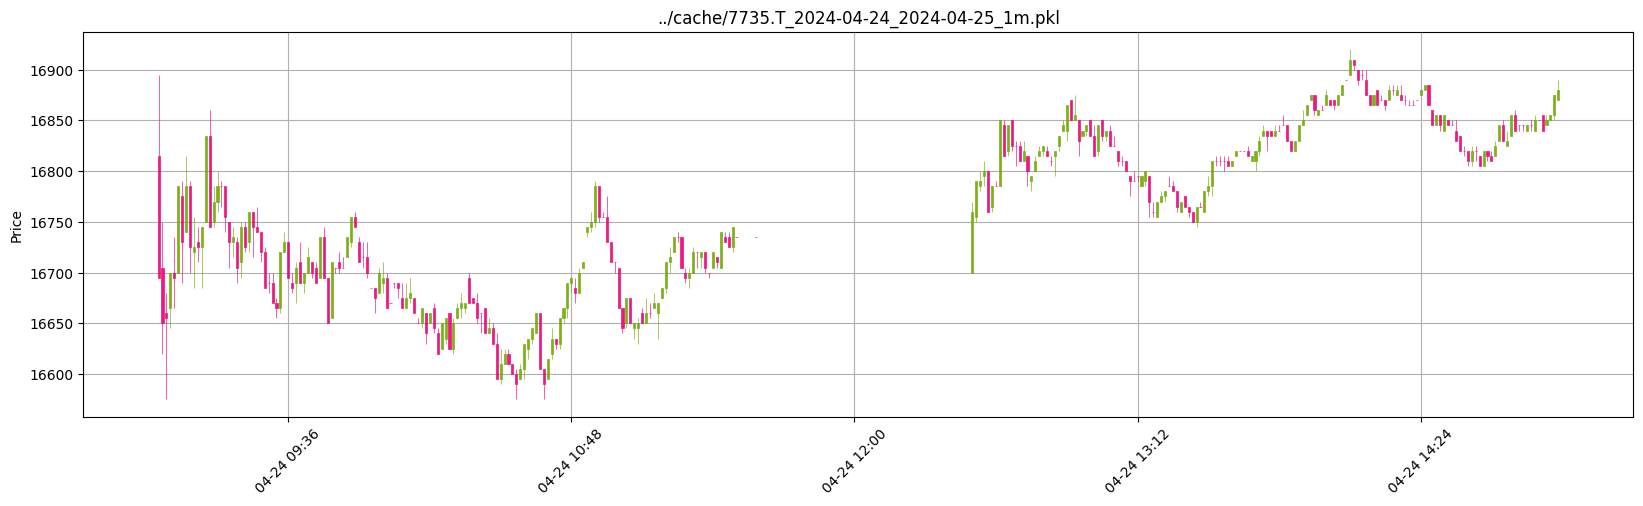

In [208]:
plt.rcParams["figure.figsize"] = (20, 5)

fig, ax = plt.subplots()
ax.set_title(file_cache)

mpf.plot(
    df,
    type='candle',
    datetime_format='%m-%d %H:%M',
    tight_layout=False,
    style='binance',
    show_nontrading=True,
    ax=ax
)
ax.grid()

plt.show()

In [209]:
diff_mean = '%.1f' % np.mean(series_high_low)
diff_median = '%.1f' % np.median(series_high_low)

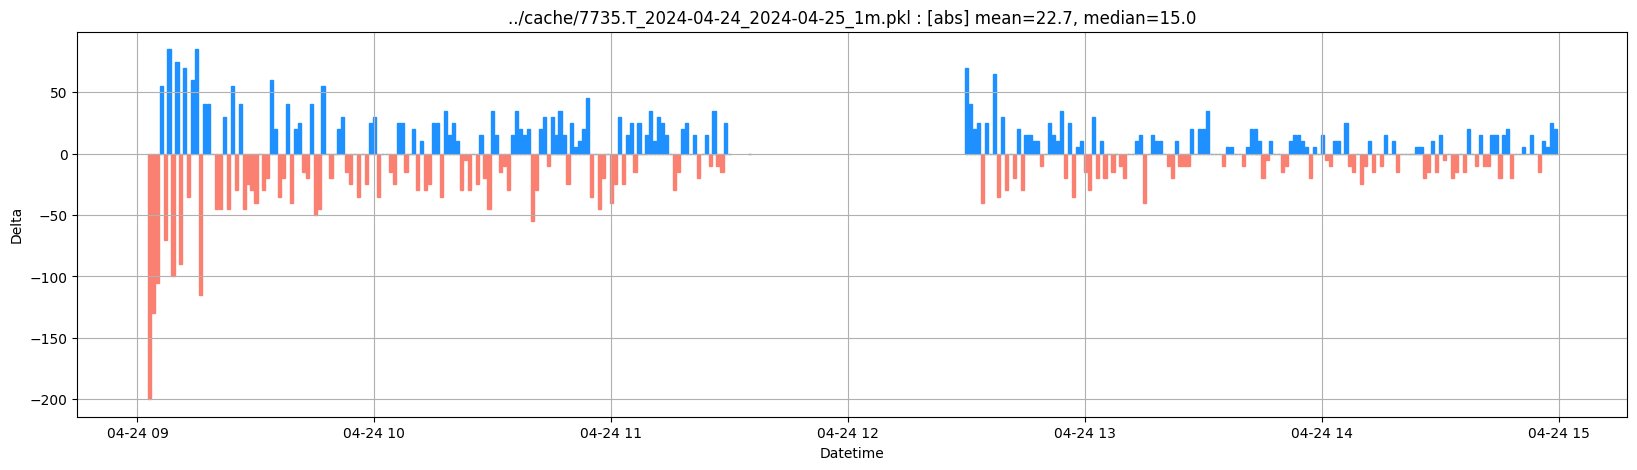

In [210]:
plt.rcParams["figure.figsize"] = (20, 5)

fig, ax = plt.subplots()
ax.set_title('%s : [abs] mean=%s, median=%s' % (file_cache, diff_mean, diff_median))

sns.barplot(series_diff, native_scale=True, ax=ax)

for i, delta in enumerate(series_diff):
    if delta > 0:
        color = 'dodgerblue'
    elif delta < 0:
        color = 'salmon'
    else:
        color = 'gray'
    ax.get_children()[i].set_color(color)

ax.grid()

plt.show()